# Skilaverkefni 12 í Stærðfræði og reiknifræði

# VV4. Próf í stærðfræði og reiknifræði 2019
## A. Python Forrit


1) Skrifið Python fall með tvo stika, $ a $
 og $ n $
. Ef $a < 0$
 á fallið að skila $a^n$
 en ef $a ≥ 0$
 á það að skila $\sqrt{a^n+a}$ 
. Skrifið tilheyrandi Python forrit sem kallar á fallið með $a = 2$
, $n = 7$
 og með $a = −2$
, $n = 3$
 og skrifar út niðurstöðu þess í báðum tilvikum.

## Lausn


In [62]:
from math import sqrt
def math(a,n):
    if a<0:
        return a**n
    else:
        return sqrt(a**n+a)
    
print(math(2,7))
print(math(-2,3))

11.40175425099138
-8


2) Skrifið Python fall eða reiknirit sem tekur inn einhvern lista af tölum og skilar staðsetningu fyrstu tölunnar 
sem uppfyllir jöfnuna $x^5 + x = 246$ Ef engin slík tala finnst á fallið að skila $–1$. Skrifið tilsvarandi forrit eða reiknirit sem prófar fallið 
með listanum [5, 4, 3, 2, 1]

## Lausn

In [63]:
def list(n):
    for y,x in enumerate(n):
        if x**5 + x == 246:
            return y
    return -1

print(list([5,4,3,2,1]))

2


# VV5. Flokkun veðurgagna með k-means reikniriti 


1) Lesið skrána http://cs.hi.is/python/hiti-urkoma.txt inn í þrjá vigra: ár, hiti, úrkoma. Búið svo til $n \times 2 $ fylki úr hita og úrkomu (t.d. með X = np.c_[...]), staðlið það með whiten og flokkið í fjóra hópa með k-means reikniritinu. Hafið npr.seed() með svo sömu flokkar fáist við endurteknar keyrslur. Hverjir eru miðpunktar hópanna og hvað eru mörg ár í hverjum hópi?

## Lausn

In [64]:
import numpy as np, numpy.random as npr
from scipy.cluster.vq import kmeans, vq, whiten

npr.seed(23)


file = "http://cs.hi.is/python/hiti-urkoma.txt"
(Year, Heat, Rainfall) = np.loadtxt(file).T

X = np.c_[Heat, Rainfall]
X = whiten(X)
(cb, d) = kmeans(X,4)
(mx,my) = cb.T
(code,dvec) = vq(X, cb)
print(f"Miðpunktar hópanna er {mx} og {my}")


def groups():
    for k in range(0,4):
        cnt = 0
        for i in code:
            if i==k:
                cnt += 1
        print(f"Fjöldi ára í hóp {k} er {cnt}")
groups()

Miðpunktar hópanna er [6.83769634 4.15941886 5.37452998 6.01324224] og [4.27809624 4.24963666 3.61690936 5.80171902]
Fjöldi ára í hóp 0 er 13
Fjöldi ára í hóp 1 er 15
Fjöldi ára í hóp 2 er 24
Fjöldi ára í hóp 3 er 18


2) Teiknið mynd af hópunum eins og gert er í sýnidæminu í kafla 3.6; merkið m.a. miðpunktana inn með stjörnum. Notið qcmap til að velja liti og bætið svo við rúðuneti og ásamerkingum sbr. aftasta sýnidæmið í kafla A5 í Viðauka A. Bætið loks við litastiku eins og þar er gert sem sýnir flokkun áranna, en þau ættu að flokkast gróflega í þurr, blaut, heit og köld.

## Lausn

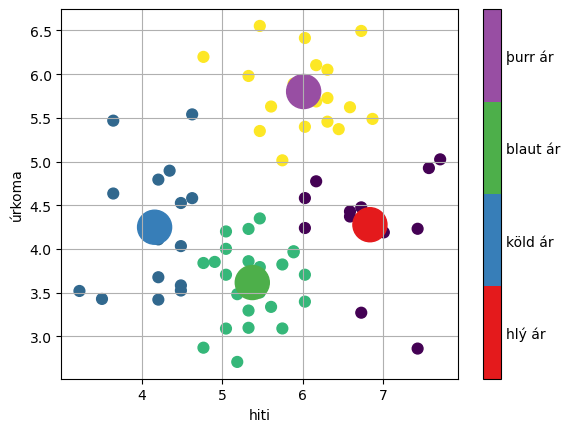

In [65]:
import matplotlib.pyplot as plt

def qcmap(n):
   import matplotlib.colors as clrs
   use_cmap = 'Set1' if n <= 9 else 'tab20'
   cmap = plt.get_cmap(use_cmap)(range(n))
   if n > 5: cmap[5] = [0.95, 0.75, 0, 1]  # dekkja gula litinn
   return clrs.LinearSegmentedColormap.from_list("",cmap,n)

import matplotlib.pyplot as plt

(x,y) = X.T
(mx,my) = cb.T

lbl = ['hlý ár', 'köld ár', 'blaut ár', 'þurr ár']

plt.xlabel('hiti'), plt.ylabel('úrkoma')
plt.scatter(x, y, s=60, c=code)
plt.scatter(mx, my, s=600, c=[0,1,2,3], marker='o', cmap=qcmap(4))

cba =plt.colorbar(ticks=range(4))
plt.clim(-0.5,4-0.5)
cba.set_ticklabels(lbl)
cba.ax.tick_params(size=0)
plt.grid()

3) Teiknið nú nýja mynd þar sem árin eru flokkuð í 10 hópa. Merkið hópana á litastiku þessarar myndar með tölunum 1–10 og setjið label á stikuna: Flokkur. Látið litastiku þessarar myndar líka vera breiðari en á myndinni í lið 2.

## Lausn

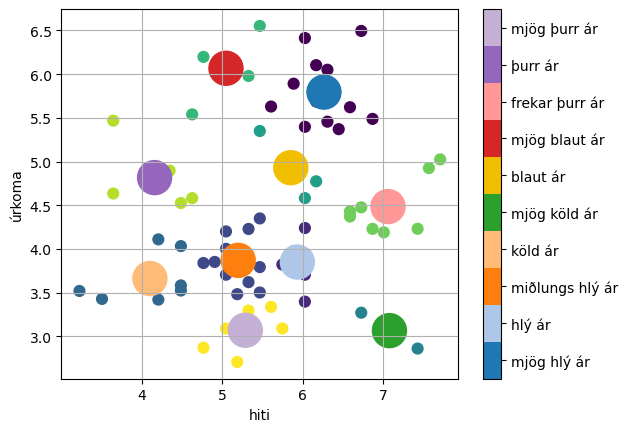

In [66]:
npr.seed(23)

(cb, d) = kmeans(X,10)
(x,y) = X.T

(mx,my) = cb.T
(code,dvec) = vq(X, cb)


lbl = ['mjög hlý ár', 'hlý ár', 'miðlungs hlý ár', 'köld ár', 'mjög köld ár', 'blaut ár', 'mjög blaut ár', 'frekar þurr ár', 'þurr ár', 'mjög þurr ár'];
plt.scatter(x, y, s=60, c=code)
plt.scatter(mx, my, s=600, c=[0,1,2,3,4,5,6,7,8,9], marker='o', cmap=qcmap(10))
plt.xlabel('hiti'), plt.ylabel('úrkoma')

cb =plt.colorbar(ticks=range(10))
plt.clim(-0.5,10-0.5)
cb.set_ticklabels(lbl)
plt.grid()

# VV6. Hlutapróf 2 vorið 2021
## B. Er punktur í plani?
Í þessu dæmi á að skrifa Python-fall til að kanna hvort gefinn punktur liggi í gefnu plani í þrívíðu rúmi. Vegna þess að Python reiknar með endanlegri nákvæmni verður að láta duga að athuga hvort punkturinn sé í planinu eða mjög nálægt því.

1) Skrifið Python-fall næstum_eins(u,v) sem skilar sönnu (True) ef $u \approx v$ í þeim skilningi að fjarlægðin milli vigranna $u$ og $v$ sé minni en $10^{-8}$, en annars ósönnu (False). Prófið með pari vigra sem eru ólíkir og pari mjög líkra vigra.

## Lausn

In [15]:
def næstum_eins(u,v):
    diff = np.linalg.norm(u-v)
    if diff < 1e-8:
        return True    
    return False

u = np.array([11.0, 24.0])
v = np.array([11.0000000000005, 24.000000000000095])
print(næstum_eins(u,v))

u = np.array([11, 24])
v = np.array([10, 24])
print(næstum_eins(u,v))

True
False


2) Í kafla 2.11 er gefið skilyrði (merkt $(*)$ ), sem nota má til að kanna hvort punktur (eða vigur) 𝑢
sé í planinu sem tveir þverstaðlaðir vigrar $a$ og $b$ spanna, sbr. sýnidæmið aftast í greininni. Fyrir tvo vigra segir reglan að það gildi þ.þ.a.a. 
        
$  u = (a\cdot u)a + (b\cdot u)b $

Skrifið Python-fall í_plani(u,a,b) þar sem stikarnir eru vigrar í $\Bbb R^3$ $ \{a,b\} $ er þverstaðlaður grunnur. Það á að nota fallið úr a-lið til að rannsaka hvort $u$ sé (næstum) í planinu sem $a$ og $b$ spanna.

## Lausn

In [17]:
def í_plani(u,a,b):
  x = (a @ u) * a + (b @ u) * b
  return(næstum_eins(u,x))

a = np.array([0.48, 0.64, 0.60])
b = np.array([0.8, -0.6, 0])
A = np.array([4, 2, 3])
B = np.array([6, 3, 2])

print(í_plani(A, a, b))
print(í_plani(B, a, b))

True
False


3) Prófið fallið úr b-lið með vigrunum og punktunum sem gefnir eru í sýnidæminu, sem sé $ a = (0.48, 0.64, 0.60)$, $b = (0.8, -0.6, 0)$, og svo: 

a) $u=A=(4,2,3)$ (í planinu) og 

b) $u=B=(6,3,2)$ (ekki í planinu).

## Lausn